FloatSlider(value=0.75, description='Rotation:', max=1.0, step=0.01)

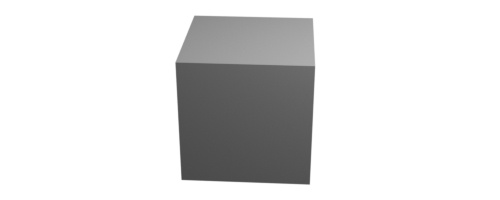

In [ ]:
import bpy
import ipywidgets as widgets
from IPython.display import display, Image, clear_output

# Create and display the slider widget
slider = widgets.FloatSlider(value=0.0, min=0.0, max=1, step=0.01, 
                             description='Rotation:', continuous_update=True)
display(slider)

def update_cube_rotation(rotation_value):
    # Update the rotation of the cube
    cube = bpy.data.objects['Cube']  
    cube.rotation_euler.z = rotation_value
    bpy.context.view_layer.update()
    
    # Render the scene
    bpy.context.scene.render.resolution_x = 500
    bpy.context.scene.render.resolution_y = 200
    bpy.context.scene.render.image_settings.file_format = 'PNG'
    bpy.context.scene.render.image_settings.color_mode = 'RGBA'
    bpy.context.scene.render.film_transparent = True
    bpy.ops.render.render()

    # Save and display the rendered image
    path = "/tmp/test.png"  # Use a temporary path
    bpy.data.images['Render Result'].save_render(filepath=path)
    clear_output(wait=True)  # Clear the previous output
    display(slider)  # Redisplay the slider
    display(Image(filename=path))

# Function to handle slider value changes
def on_slider_change(change):
    update_cube_rotation(change['new'])

# Observe the slider
slider.observe(on_slider_change, names='value')

# Initial update of the cube's rotation
update_cube_rotation(slider.value)